# 1.3 Analiza in vizualizacija podatkov o molekulah

In [1]:
%run __A_knjiznice.py
from __A_knjiznice import *
from __C_konstante import *

%matplotlib inline

V [2] vnesemo združene podatakte s podatkovnih baz ChEMBL in BindingDB. Namen je pregled podatkov pred izključitvami. 

In [2]:
molecules = pd.read_csv(f'{path_files}/joined_df.csv')
molecules

,smiles,IC50,pIC50,ROMol,target_organism
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens
...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens


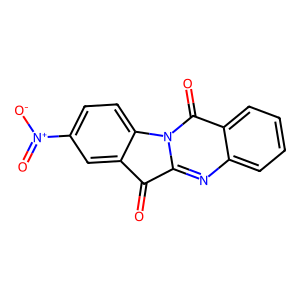

'SMILES: O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O'

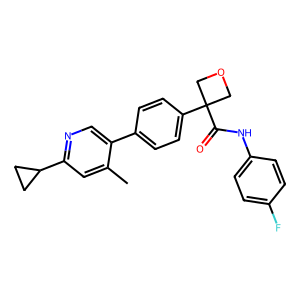

'SMILES: Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1'

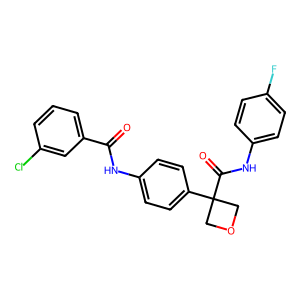

'SMILES: O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1cccc(Cl)c1'

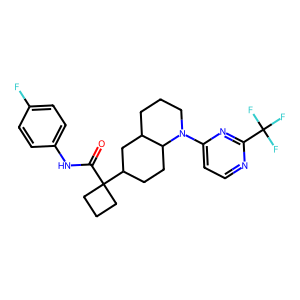

'SMILES: O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F)F)n3)C2)CCC1'

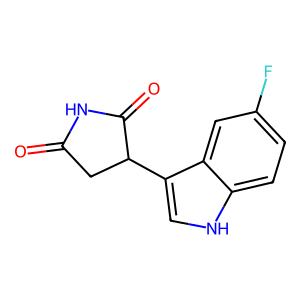

'SMILES: O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1'

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image
import pandas as pd
from IPython.display import display

# Example DataFrame (replace with your actual DataFrame)
# Assuming 'molecules' contains columns 'Smiles', 'Aktivnost', and 'pIC50'
# Example: molecules = pd.read_csv("path_to_your_file.csv")

# Sort the molecules by 'pIC50' in descending order (most active first)
sorted_active_molecules = molecules.sort_values(by='pIC50', ascending=False)

# Select the top 20 most active molecules
top_20_active_molecules = sorted_active_molecules.head(5)

# Generate RDKit molecule objects from the SMILES strings
molecule_images = []
for index, row in top_20_active_molecules.iterrows():
    smiles = row['smiles']
    
    # Convert SMILES to a molecule
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the molecule is valid
    if mol is not None:
        # Draw the molecule in 2D and append to the list
        img = Draw.MolToImage(mol)
        molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
    else:
        print(f"Invalid SMILES: {smiles}")

# Display all images in the notebook with SMILES
for img, smiles in molecule_images:
    display(img)  # Display the image
    display(f"SMILES: {smiles}")  # Display the SMILES below the image


In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

molecules_analysis = molecules.copy()

# Define the function to calculate specific property
def calc_property(smiles, param):
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # Check if molecule was successfully created
        if param == 'Molekulska_masa':
            return Descriptors.MolWt(mol)  # Molecular Weight
        elif param == 'logP':
            return Descriptors.MolLogP(mol)  # LogP
        elif param == 'Število_O_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')  # Oxygen count
        elif param == 'Število_N_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')  # Nitrogen count
        elif param == 'Akceptorji_H_vezi':
            return rdMolDescriptors.CalcNumHBA(mol)  # Hydrogen Bond Acceptors
        elif param == 'Donorji_H_vezi':
            return rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen Bond Donors
        elif param == 'Število_aromatskih_obročev':
            return rdMolDescriptors.CalcNumAromaticRings(mol)  # Aromatic Rings
        elif param == 'TPSA':
            return rdMolDescriptors.CalcTPSA(mol)  # Topological Polar Surface Area
        elif param == 'Število_rotirajočih_vezi':
            return Descriptors.NumRotatableBonds(mol)  # Number of Rotatable 
        else:
            return None  # Return None for unsupported params
    else:
        return None  # Return None if the molecule is invalid

# Example: Assuming 'molecules' is your DataFrame with 'smiles' column
# molecules = pd.read_csv('your_file.csv')  # If you're loading the data

# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis[prop] = molecules['smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis

,smiles,IC50,pIC50,ROMol,target_organism,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,293.238,1.83830,4,3,6,0,3,95.10,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens,402.469,4.98022,2,2,3,1,3,51.22,5
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens,424.859,4.63810,3,2,3,2,3,67.43,5
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens,476.518,5.82860,1,4,4,1,2,58.12,4
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,232.214,1.43710,2,2,2,2,2,61.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens,213.162,2.49050,0,3,2,1,2,41.57,1
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens,119.127,0.95790,0,3,2,1,2,41.57,0
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens,270.214,2.28092,1,4,3,2,2,70.67,2
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens,174.207,1.36232,0,4,3,2,2,67.59,1


In [5]:
# Assuming you have already calculated the statistics
MW_stats = molecules_analysis['Molekulska_masa'].describe()
logP_stats = molecules_analysis['logP'].describe()
Aromatic_Rings_stats = molecules_analysis['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis['Število_N_atomov'].describe()
pIC50_stats = molecules_analysis['pIC50'].describe()

# Create a DataFrame to hold the statistics
stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
    'pIC50': pIC50_stats
})

# Transpose the DataFrame to have the statistics as rows
stats_df = stats_df.transpose()
stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,4291.0,364.313525,98.680366,108.144000,294.97350,365.723000,428.326000,966.816000
logP,4291.0,3.369356,1.786867,-2.109690,2.02338,3.332720,4.541300,9.545700
Število_aromatskih_obročev,4291.0,2.572128,0.830147,0.000000,2.00000,2.000000,3.000000,5.000000
Akceptorji_H_vezi,4291.0,4.883011,2.191596,1.000000,3.00000,4.000000,6.000000,19.000000
Donorji_H_vezi,4291.0,2.021673,1.307231,0.000000,1.00000,2.000000,3.000000,7.000000
Število_O_atomov,4291.0,2.359823,1.620414,0.000000,1.00000,2.000000,3.000000,13.000000
Število_N_atomov,4291.0,3.503845,1.750304,0.000000,2.00000,3.000000,5.000000,10.000000
pIC50,4291.0,6.252980,1.299802,2.221849,5.30103,6.420216,7.136677,10.744727


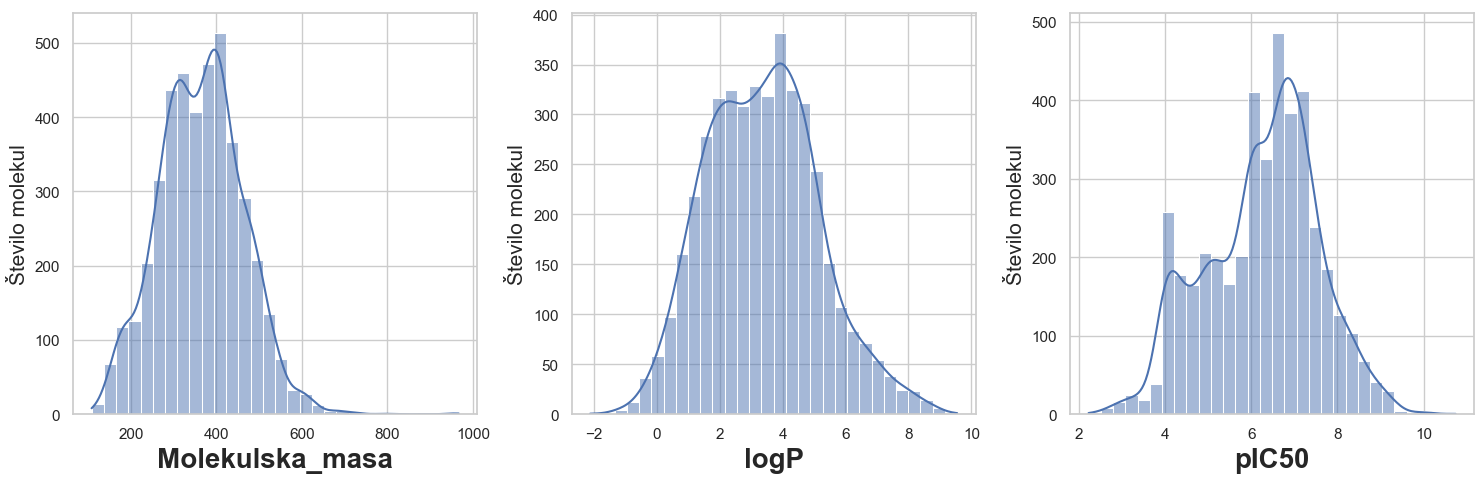

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pIC50' is already calculated and included in the molecules_analysis DataFrame
# If not, you would need to calculate it similarly to the other properties.

# List of continuous properties to visualize
continuous_properties = ['Molekulska_masa', 'logP', 'pIC50']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(15, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul',fontsize=15)

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

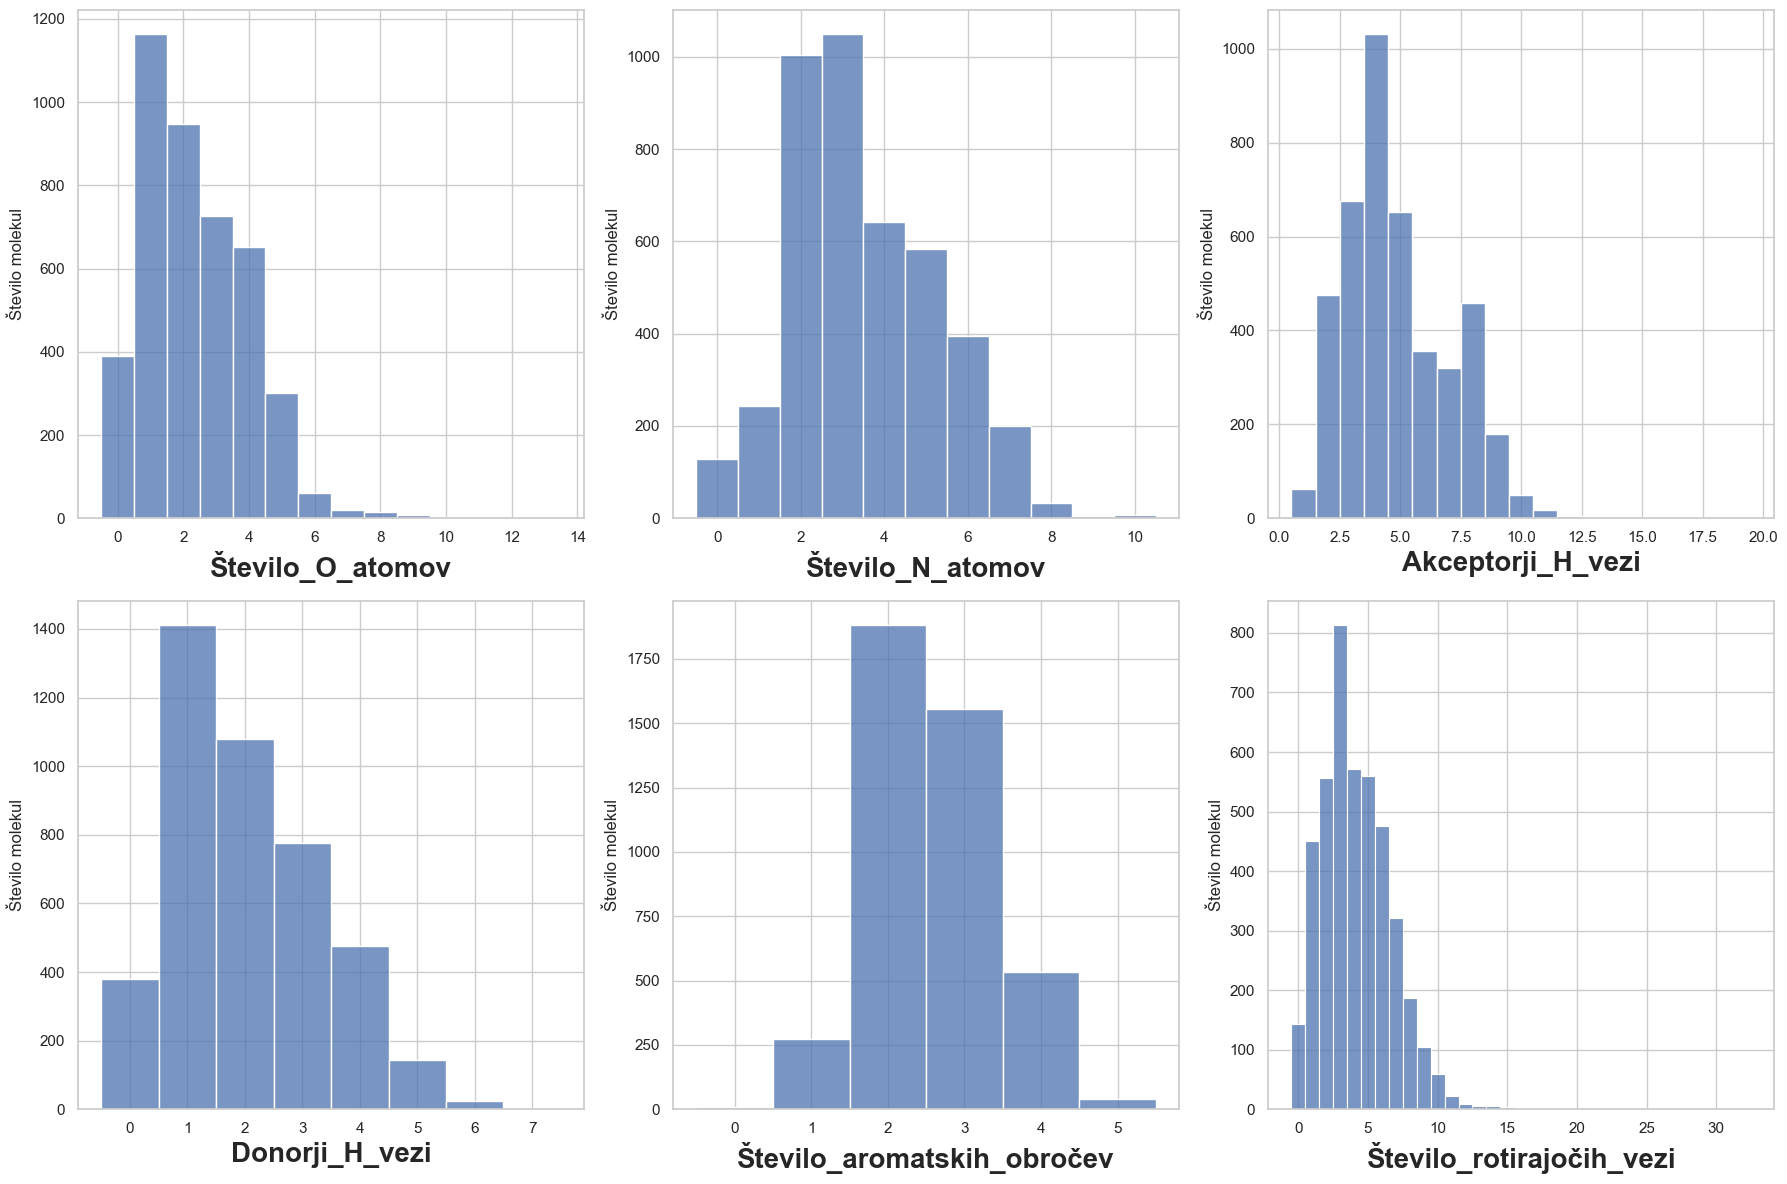

In [7]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis[prop].dropna(), bins=molecules_analysis[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul',fontsize=12)

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

# Pains

In [8]:
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)

def check_for_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        alerts = catalog.GetMatches(mol)
        if alerts:
            return [alert.GetDescription() for alert in alerts]
    return []

# Apply the function to the "smiles" column and create a new column "pains_alerts"
molecules['pains_alerts'] = molecules['smiles'].apply(check_for_pains)



molecules_with_pains = molecules[molecules['pains_alerts'].apply(lambda x: len(x) > 0)]

In [9]:
molecules_with_pains

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts
46,O=C1c2nnn(Cc3ccccc3)c2C(=O)c2nnn(Cc3ccccc3)c21,1.0,9.000000,<rdkit.Chem.rdchem.Mol object at 0x16fce69d0>,Homo sapiens,[quinone_A(370)]
151,CC1=C(CC(=O)c2sccc2Br)C(=O)c2ccccc2C1=O,3.4,8.468521,<rdkit.Chem.rdchem.Mol object at 0x16fc8f3e0>,Homo sapiens,[quinone_A(370)]
194,O=C1c2cc(F)ccc2C(=O)c2c1nnn2-c1ccc(F)c(Cl)c1,5.0,8.301030,<rdkit.Chem.rdchem.Mol object at 0x16fce47b0>,Homo sapiens,[quinone_A(370)]
328,O=C1c2ccc(F)cc2C(=O)c2c1nnn2-c1ccc(F)c(Cl)c1,10.0,8.000000,<rdkit.Chem.rdchem.Mol object at 0x16fce4b30>,Homo sapiens,[quinone_A(370)]
388,O=C1c2ccccc2C(=O)c2c1nnn2-c1ccc(F)c(Cl)c1,13.0,7.886057,<rdkit.Chem.rdchem.Mol object at 0x16fce57e0>,Homo sapiens,[quinone_A(370)]
...,...,...,...,...,...,...
4201,C[C@@H]1c2[nH]c3ccccc3c2C[C@H]2C(=O)N(C)C(=S)N12,174600.0,3.757956,<rdkit.Chem.rdchem.Mol object at 0x16fcacc80>,Homo sapiens,[indol_3yl_alk(461)]
4202,C[C@@H]1c2[nH]c3ccccc3c2Cc2c(O)n(C)c(=S)n21,174600.0,3.757956,<rdkit.Chem.rdchem.Mol object at 0x16fcaccf0>,Homo sapiens,[indol_3yl_alk(461)]
4239,Nc1ccc(Nc2ccccc2)cc1,400000.0,3.397940,<rdkit.Chem.rdchem.Mol object at 0x16fccc5f0>,Homo sapiens,[anil_no_alk(40)]
4256,O=C1CC(=O)c2ccccc2C1=O,675000.0,3.170696,<rdkit.Chem.rdchem.Mol object at 0x16fce2110>,Homo sapiens,"[imine_one_A(321), keto_keto_gamma(5)]"


In [10]:
import pandas as pd

# Filter molecules with PAINS alerts
molecules_with_pains = molecules[molecules['pains_alerts'].apply(lambda x: len(x) > 0)]

# Convert the list of alerts into a frozenset for unique grouping
molecules_with_pains['alert_group'] = molecules_with_pains['pains_alerts'].apply(frozenset)

# Count the occurrences of each unique alert group
group_counts = molecules_with_pains['alert_group'].value_counts()

# Convert to a DataFrame for better visualization
group_counts_df = group_counts.reset_index()
group_counts_df.columns = ['Alert Group', 'Count']

# Sort by count (optional)
group_counts_df.sort_values(by='Count', ascending=False, inplace=True)

# Format the alert group as strings for easier reading
group_counts_df['Alert Group'] = group_counts_df['Alert Group'].apply(lambda x: ', '.join(sorted(x)))

# Display the grouped counts
print(group_counts_df)

                             Alert Group  Count
0                         quinone_A(370)    319
1         imine_one_A(321), quinone_D(2)     36
2                     indol_3yl_alk(461)     25
3                    hzone_phenol_A(479)     13
4                  imine_one_isatin(189)      6
5                     anil_di_alk_C(246)      6
6                     anil_di_alk_B(251)      5
7                             azo_A(324)      4
8                         catechol_A(92)      4
11                    anil_di_alk_A(478)      3
9                         mannich_A(296)      3
10       ene_one_hal(17), quinone_A(370)      3
12                       ene_cyano_A(19)      2
13                    keto_keto_gamma(5)      1
14                    anil_di_alk_E(186)      1
15    anil_di_alk_A(478), quinone_A(370)      1
16                      imine_imine_A(9)      1
17                       anil_no_alk(40)      1
18  imine_one_A(321), keto_keto_gamma(5)      1


/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_27076/2694196845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molecules_with_pains['alert_group'] = molecules_with_pains['pains_alerts'].apply(frozenset)


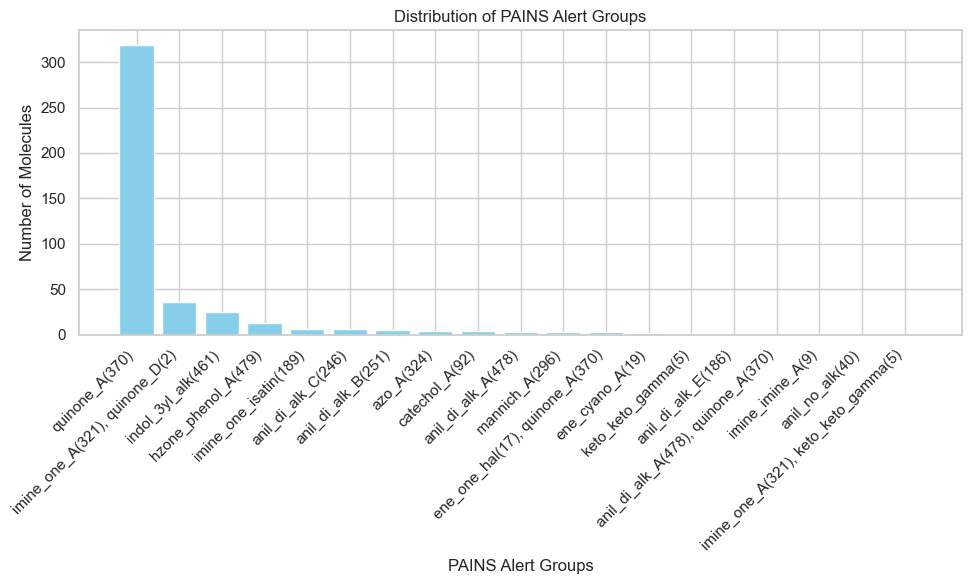

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(group_counts_df['Alert Group'], group_counts_df['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('PAINS Alert Groups')
plt.ylabel('Number of Molecules')
plt.title('Distribution of PAINS Alert Groups')
plt.tight_layout()
plt.show()


# Pregled lastnosti aktivnih in neaktivnih molekul

Vpeljemo molekule z izključitvami in opredeljeno aktivnostjo, da pregledamo fizikalno kemijske lastnosti.

In [12]:
molecules_w_exclusions = pd.read_csv('dp.csv')
molecules_w_exclusions

,Smiles,ROMol,Activity
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,1
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,1
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,1
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,1
...,...,...,...
4137,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,0
4138,c1ccc2[nH]nnc2c1,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,0
4139,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,0
4140,Cc1ccc(N)cc1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,0


In [13]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

molecules_w_exclusions_analysis = molecules_w_exclusions.copy()

molecules_w_exclusions_analysis.rename(columns={'Activity': 'Aktivnost'}, inplace = True)

continuous_properties = ['Molekulska_masa', 'logP', 'pIC50']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']


# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_w_exclusions_analysis[prop] = molecules_w_exclusions_analysis['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_w_exclusions_analysis

,Smiles,ROMol,Aktivnost,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,1,293.238,1.83830,4,3,6,0,3,95.10,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,1,402.469,4.98022,2,2,3,1,3,51.22,5
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,1,424.859,4.63810,3,2,3,2,3,67.43,5
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,1,476.518,5.82860,1,4,4,1,2,58.12,4
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,1,232.214,1.43710,2,2,2,2,2,61.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4137,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,0,213.162,2.49050,0,3,2,1,2,41.57,1
4138,c1ccc2[nH]nnc2c1,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,0,119.127,0.95790,0,3,2,1,2,41.57,0
4139,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,0,270.214,2.28092,1,4,3,2,2,70.67,2
4140,Cc1ccc(N)cc1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,0,174.207,1.36232,0,4,3,2,2,67.59,1


In [14]:
import pandas as pd

# Assuming molecules_w_exclusions_analysis is your DataFrame
# Filter the DataFrame for active and inactive molecules
active_molecules = molecules_w_exclusions_analysis[molecules_w_exclusions_analysis['Aktivnost'] == 1]
inactive_molecules = molecules_w_exclusions_analysis[molecules_w_exclusions_analysis['Aktivnost'] == 0]

# Calculate statistics for active molecules
MW_stats_active = active_molecules['Molekulska_masa'].describe()
logP_stats_active = active_molecules['logP'].describe()
Aromatic_Rings_stats_active = active_molecules['Število_aromatskih_obročev'].describe()
HBA_stats_active = active_molecules['Akceptorji_H_vezi'].describe()
HBD_stats_active = active_molecules['Donorji_H_vezi'].describe()
O_Count_stats_active = active_molecules['Število_O_atomov'].describe()
N_Count_stats_active = active_molecules['Število_N_atomov'].describe()

# Create a DataFrame for active statistics
active_stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats_active,
    'logP': logP_stats_active,
    'Število_aromatskih_obročev': Aromatic_Rings_stats_active,
    'Akceptorji_H_vezi': HBA_stats_active,
    'Donorji_H_vezi': HBD_stats_active,
    'Število_O_atomov': O_Count_stats_active,
    'Število_N_atomov': N_Count_stats_active
})

# Transpose the DataFrame to have the statistics as rows
active_stats_df = active_stats_df.transpose()

# Calculate statistics for inactive molecules
MW_stats_inactive = inactive_molecules['Molekulska_masa'].describe()
logP_stats_inactive = inactive_molecules['logP'].describe()
Aromatic_Rings_stats_inactive = inactive_molecules['Število_aromatskih_obročev'].describe()
HBA_stats_inactive = inactive_molecules['Akceptorji_H_vezi'].describe()
HBD_stats_inactive = inactive_molecules['Donorji_H_vezi'].describe()
O_Count_stats_inactive = inactive_molecules['Število_O_atomov'].describe()
N_Count_stats_inactive = inactive_molecules['Število_N_atomov'].describe()

# Create a DataFrame for inactive statistics
inactive_stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats_inactive,
    'logP': logP_stats_inactive,
    'Število_aromatskih_obročev': Aromatic_Rings_stats_inactive,
    'Akceptorji_H_vezi': HBA_stats_inactive,
    'Donorji_H_vezi': HBD_stats_inactive,
    'Število_O_atomov': O_Count_stats_inactive,
    'Število_N_atomov': N_Count_stats_inactive
})

# Transpose the DataFrame to have the statistics as rows
inactive_stats_df = inactive_stats_df.transpose()

In [15]:
active_stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2103.0,401.174511,79.208688,108.1440,347.2390,405.47300,455.65650,690.2160
logP,2103.0,3.464503,1.940915,-1.0459,1.8925,3.61498,4.80656,9.5457
Število_aromatskih_obročev,2103.0,2.598669,0.783778,0.0000,2.0000,2.00000,3.00000,5.0000
Akceptorji_H_vezi,2103.0,5.634332,2.215313,1.0000,4.0000,5.00000,8.00000,15.0000
Donorji_H_vezi,2103.0,2.406087,1.371381,0.0000,1.0000,2.00000,3.00000,7.0000
Število_O_atomov,2103.0,2.526866,1.475172,0.0000,1.0000,2.00000,4.00000,11.0000
Število_N_atomov,2103.0,4.233000,1.753592,0.0000,3.0000,4.00000,6.00000,10.0000


In [16]:
inactive_stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2039.0,325.203618,100.663996,109.12800,257.7820,317.3910,381.4250,966.816
logP,2039.0,3.319450,1.643080,-2.10969,2.1535,3.2471,4.3341,9.101
Število_aromatskih_obročev,2039.0,2.544385,0.872020,0.00000,2.0000,3.0000,3.0000,5.000
Akceptorji_H_vezi,2039.0,4.059833,1.905869,1.00000,3.0000,4.0000,5.0000,19.000
Donorji_H_vezi,2039.0,1.688573,1.119294,0.00000,1.0000,2.0000,2.0000,6.000
Število_O_atomov,2039.0,2.087298,1.687927,0.00000,1.0000,2.0000,3.0000,13.000
Število_N_atomov,2039.0,2.818538,1.425765,0.00000,2.0000,3.0000,4.0000,10.000


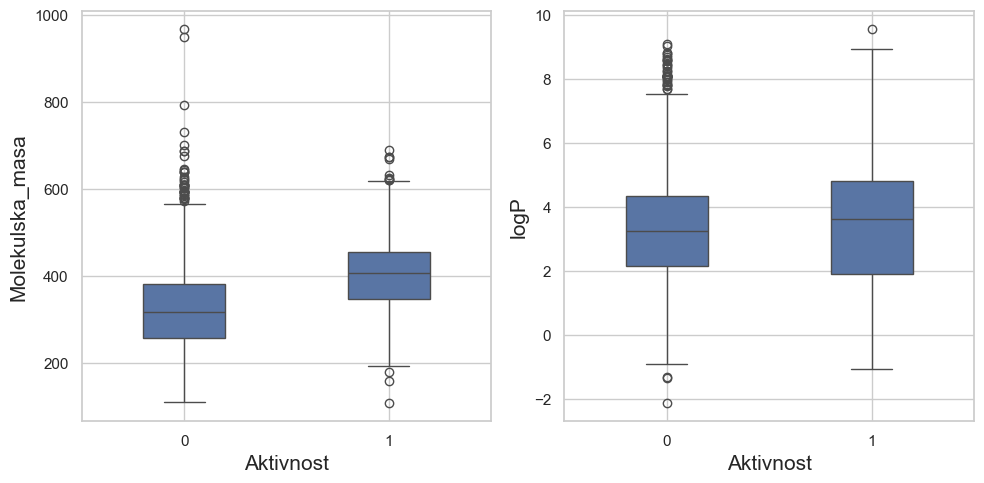

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming molecules_w_exclusions_analysis is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots for each measure
measures = ['Molekulska_masa', 'logP']

# Create a figure with subplots (2 columns)
fig, axes = plt.subplots(nrows=1, ncols=len(measures), figsize=(10, 5))  # Adjusted figure size

for ax, measure in zip(axes, measures):
    sns.boxplot(x='Aktivnost', y=measure, data=molecules_w_exclusions_analysis, ax=ax, width=0.4)  # Adjusted box width
    #ax.set_title(f'Škatlasti diagram vrednosti: {measure}', fontsize=14)
    ax.set_xlabel('Aktivnost', fontsize=15)
    ax.set_ylabel(measure, fontsize=15)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Define the criteria for Lipinski's Rule of Five
def check_lipinski(row):
    # Check each criterion and return 1 if all are met, otherwise return 0
    return int(
        row['Molekulska_masa'] < 500 and
        row['logP'] < 5 and
        row['Akceptorji_H_vezi'] <= 10 and
        row['Donorji_H_vezi'] <= 5 and
        row.get('Rotatable_Bonds', 0) <= 10  # Assuming you have a column for rotatable bonds
    )

# Apply the function to both active and inactive DataFrames
active_lipinski_compliance = active_molecules.apply(check_lipinski, axis=1)
inactive_lipinski_compliance = inactive_molecules.apply(check_lipinski, axis=1)

# Count compliant molecules
active_compliant_count = active_lipinski_compliance.sum()
inactive_compliant_count = inactive_lipinski_compliance.sum()

# Count non-compliant molecules
active_non_compliant_count = len(active_lipinski_compliance) - active_compliant_count
inactive_non_compliant_count = len(inactive_lipinski_compliance) - inactive_compliant_count

# Print results
print("Active Molecules Compliance with Lipinski's Rule of Five:")
print(f"Compliant: {active_compliant_count}, Non-Compliant: {active_non_compliant_count}")

print("\nInactive Molecules Compliance with Lipinski's Rule of Five:")
print(f"Compliant: {inactive_compliant_count}, Non-Compliant: {inactive_non_compliant_count}")

Active Molecules Compliance with Lipinski's Rule of Five:
Compliant: 1516, Non-Compliant: 587

Inactive Molecules Compliance with Lipinski's Rule of Five:
Compliant: 1712, Non-Compliant: 327


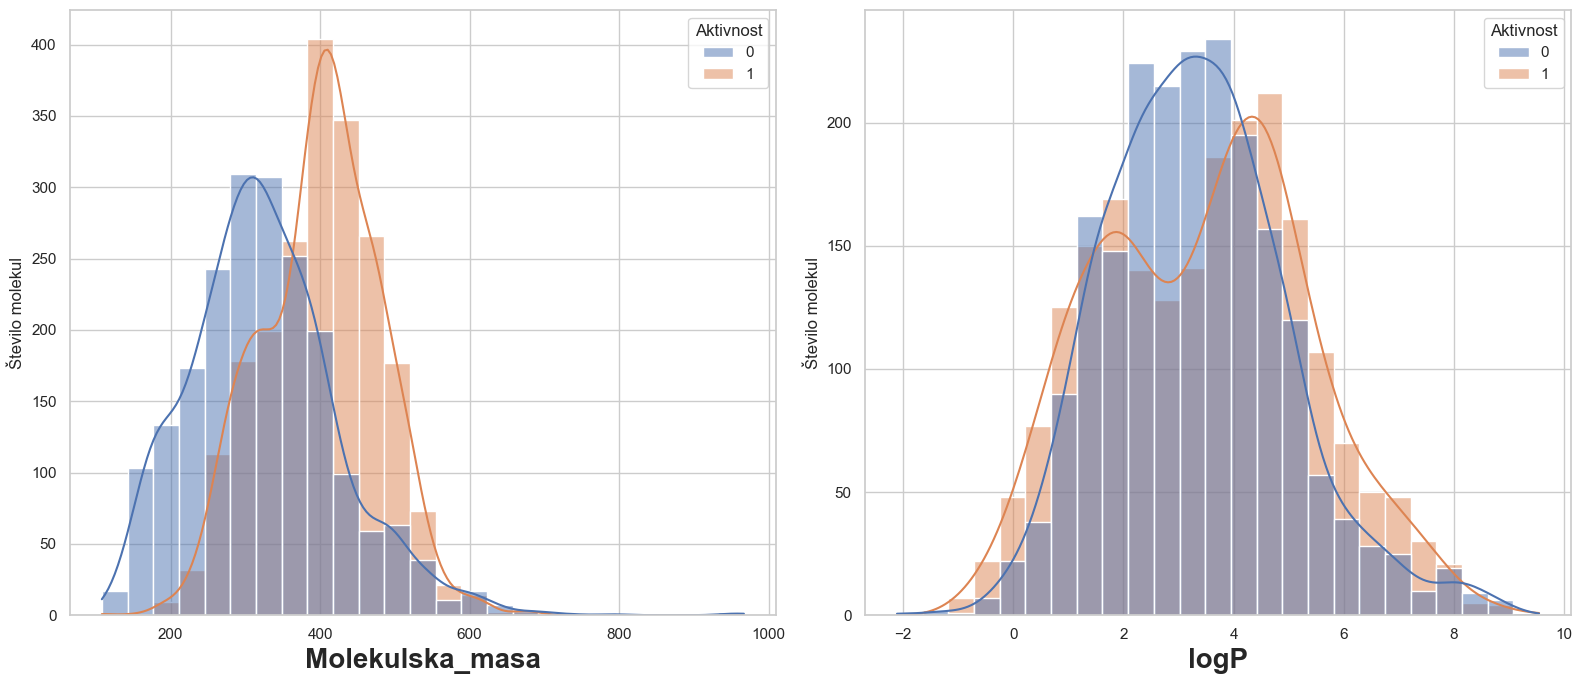

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pIC50' is already calculated and included in the molecules_analysis DataFrame
# If not, you would need to calculate it similarly to the other properties.

# List of continuous properties to visualize
continuous_properties = ['Molekulska_masa', 'logP']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(16, 7))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(data=molecules_w_exclusions_analysis, x=prop, hue='Aktivnost', bins=25, kde=True, ax=axes[i]) # multiple="dodge"
    axes[i].set_xlabel(prop, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul')
    #axes[i].set_title(f'Razporezditev vrednosti  {prop}', fontsize=18, fontweight='bold')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()


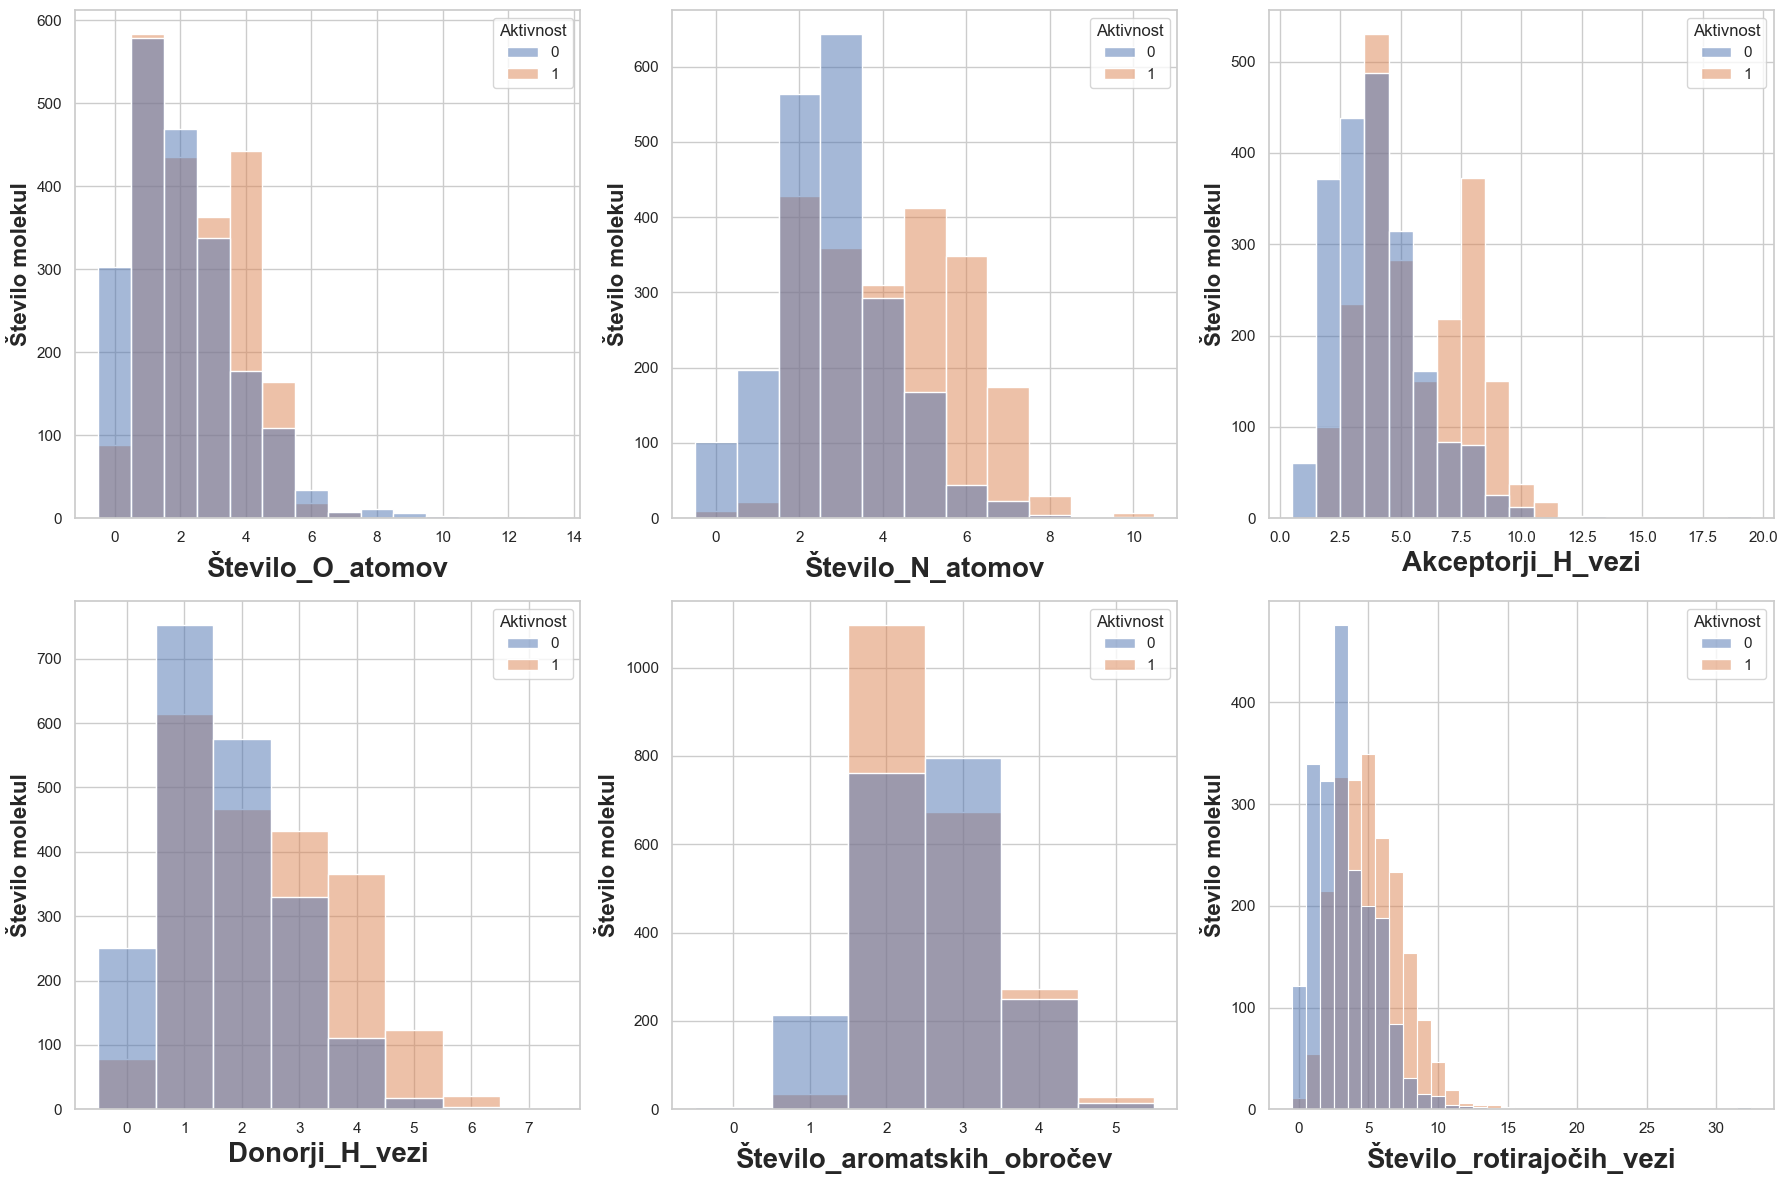

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Activity' is a column in the molecules_analysis DataFrame indicating active/inactive status
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(data=molecules_w_exclusions_analysis, x=prop, hue='Aktivnost', bins=molecules_w_exclusions_analysis[prop].nunique(), 
                 discrete=True, ax=axes[i]) #multiple="dodge"
    axes[i].set_xlabel(prop, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul', fontsize=16, fontweight='bold')
    #axes[i].set_title(f'Distribucija {prop}', fontsize=18, fontweight='bold')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()


## Funkcionalne skupine

In [21]:
import pandas as pd
from rdkit import Chem
from collections import Counter
from scipy.stats import chi2_contingency

# Predefined list of exotic functional group SMARTS patterns
functional_groups_smarts = {
    # Common Groups
    'Aldehyde': '[CX3H1]=O',
    'Alcohol': '[OX2H]',
    'Carboxylic Acid': '[CX3](=O)[OX2H]',
    'Amine': '[NX3H2]',
    'Ketone': '[CX3]=O',
    'Ester': '[CX3](=O)[OX2]',
    
    # Specific Halogen Groups
    'Halogen': '[F,Cl,Br,I]',
    'Fluorine': '[F]',
    'Chlorine': '[Cl]',
    'Bromine': '[Br]',
    'Iodine': '[I]',
    'Geminal Dihalide': '[CX4]([F,Cl,Br,I])([F,Cl,Br,I])',
    'Vinyl Halide': '[CX3]=[CX3][F,Cl,Br,I]',
    'Aryl Halide': 'c[F,Cl,Br,I]',
    
    # Halogen Enrichment
    'More than 2 Halogens': '[CX4]([F,Cl,Br,I])([F,Cl,Br,I])([F,Cl,Br,I])',
    'More than 2 Fluorines': '[CX4]([F])([F])([F])',
    'More than 2 Chlorines': '[CX4]([Cl])([Cl])([Cl])',
    'More than 2 Bromines': '[CX4]([Br])([Br])([Br])',
    'More than 2 Iodines': '[CX4]([I])([I])([I])',
    
    # Nitrogen-Oxygen Exotic Groups
    'Nitroso': '[NX2]=O',
    'Nitro': '[NX3](=O)([OX1])',
    'Nitrate': '[NX3](=O)([OX1])[OX2H]',
    'Hydrazine': 'NN',
    'Hydroxylamine': 'NO',
    'Azide': 'N=[N+]=[N-]',
    
    # Exotic Rings and Heterocycles
    'Oxirane (Epoxide)': '[OX2]1[CX4][CX4]1',
    'Aziridine': '[NX3]1[CX4][CX4]1',
    'Thiazole': 'c1scn1',
    'Oxazole': 'c1ocn1',
    'Imidazole': 'c1ncnc1',
    'Triazole': 'c1nnnn1',
    'Tetrazole': 'c1nnnn1',
    'Isoxazole': 'c1ocn1',
    'Benzimidazole': 'c1ccc2nc[nH]c2c1',
    
    # Phosphorus and Sulfur Groups
    'Phosphate': '[PX4](=O)([OX1])[OX2H]',
    'Sulfonamide': '[SX4](=O)(=O)[NX3]',
    'Sulfone': '[SX4](=O)(=O)[CX4]',
    'Thiol': '[SX2H]',
    'Thioether': '[SX2][CX4]',
    
    # Exotic Bridges and Linkers
    'Diazo': '[NX2]=[CX2]=[NX2]',
    'Carbodiimide': '[NX2]=[CX2]=[NX2]',
    'Isocyanate': '[NX2]=[CX2]=O',
    'Urea': '[NX3][CX3](=O)[NX3]',
    'Guanidine': '[NX3][CX3]([NX3])[NX3]',
    'Isothiocyanate': '[NX2]=[CX2]=[SX1]',
    
    # Bicyclic Exotic Rings
    'Norbornane': 'C12CC1CCC2',
    'Spiro Compound': '[CX4]1[CX4][CX4]2[CX4][CX4]1[CX4]2',
}

# Function to identify functional groups in a molecule using SMARTS patterns
def identify_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return []  # Return empty if the SMILES is invalid
    groups = []
    for group_name, smarts in functional_groups_smarts.items():
        pattern = Chem.MolFromSmarts(smarts)
        if mol.HasSubstructMatch(pattern):
            groups.append(group_name)
    return groups

# Separate the molecules into active and inactive
active_molecules = molecules_w_exclusions_analysis[molecules_w_exclusions_analysis['Aktivnost'] == 1]
inactive_molecules = molecules_w_exclusions_analysis[molecules_w_exclusions_analysis['Aktivnost'] == 0]

# Identify functional groups in active molecules (distinct for each molecule)
active_functional_groups = Counter()
for smiles in active_molecules['Smiles']:
    groups = identify_functional_groups(smiles)
    for group in set(groups):  # Ensure unique groups per molecule
        active_functional_groups[group] += 1

# Identify functional groups in inactive molecules (distinct for each molecule)
inactive_functional_groups = Counter()
for smiles in inactive_molecules['Smiles']:
    groups = identify_functional_groups(smiles)
    for group in set(groups):  # Ensure unique groups per molecule
        inactive_functional_groups[group] += 1

# Convert to DataFrames
active_counts_df = pd.DataFrame.from_dict(active_functional_groups, orient='index', columns=['Active Molecule Count']).sort_values(by='Active Molecule Count', ascending=False)
inactive_counts_df = pd.DataFrame.from_dict(inactive_functional_groups, orient='index', columns=['Inactive Molecule Count']).sort_values(by='Inactive Molecule Count', ascending=False)

# Merge the results
functional_group_comparison = pd.merge(
    active_counts_df, 
    inactive_counts_df, 
    left_index=True, 
    right_index=True, 
    how='outer'
).fillna(0)

# Add percentage calculations
total_active_molecules = active_molecules['Smiles'].nunique()
total_inactive_molecules = inactive_molecules['Smiles'].nunique()

functional_group_comparison['% of Active Molecules'] = (functional_group_comparison['Active Molecule Count'] / total_active_molecules) * 100
functional_group_comparison['% of Inactive Molecules'] = (functional_group_comparison['Inactive Molecule Count'] / total_inactive_molecules) * 100

chi2_results = []
for group in functional_group_comparison.index:
    observed = [
        functional_group_comparison.at[group, 'Active Molecule Count'],
        functional_group_comparison.at[group, 'Inactive Molecule Count']
    ]
    expected = [
        total_active_molecules * (sum(observed) / (total_active_molecules + total_inactive_molecules)),
        total_inactive_molecules * (sum(observed) / (total_active_molecules + total_inactive_molecules))
    ]
    chi2, p = chi2_contingency([observed, expected])[:2]
    chi2_results.append((group, chi2, p))

# Convert chi-square results to DataFrame
chi2_df = pd.DataFrame(chi2_results, columns=['Functional Group', 'Chi-Square Statistic', 'p-value'])

# Merge with the main DataFrame
functional_group_comparison = functional_group_comparison.merge(chi2_df, left_index=True, right_on='Functional Group')

# Add 'Statistical Diff', 'Difference Direction', and 'Difference' columns
functional_group_comparison['Statistical Diff'] = functional_group_comparison['p-value'].apply(lambda p: 1 if p < 0.05 else 0)

# Calculate the absolute difference in percentage
functional_group_comparison['Difference'] = (functional_group_comparison['% of Active Molecules'] - functional_group_comparison['% of Inactive Molecules'])

# Sort by Active Molecule Count
functional_group_comparison = functional_group_comparison.sort_values(by='Active Molecule Count', ascending=False)

# Display the result
functional_group_comparison

,Active Molecule Count,Inactive Molecule Count,% of Active Molecules,% of Inactive Molecules,Functional Group,Chi-Square Statistic,p-value,Statistical Diff,Difference
12,1732.0,1125.0,82.358535,55.174105,Halogen,55.774779,8.126749e-14,1,27.184430
3,1645.0,971.0,78.221588,47.621383,Aryl Halide,77.689373,1.205884e-18,1,30.600205
10,1443.0,584.0,68.616262,28.641491,Fluorine,176.688392,2.561622e-40,1,39.974772
0,1174.0,793.0,55.825012,38.891614,Alcohol,31.232963,2.288470e-08,1,16.933398
17,1042.0,946.0,49.548264,46.395292,Ketone,1.008235,3.153260e-01,0,3.152973
14,834.0,374.0,39.657632,18.342325,Hydroxylamine,83.154313,7.589160e-20,1,21.315307
6,575.0,211.0,27.341893,10.348210,Bromine,82.590338,1.009493e-19,1,16.993683
8,466.0,542.0,22.158821,26.581658,Chlorine,3.983587,4.594563e-02,1,-4.422837
15,463.0,522.0,22.016167,25.600785,Imidazole,2.648864,1.036239e-01,0,-3.584617
2,431.0,428.0,20.494532,20.990682,Amine,0.039840,8.417932e-01,0,-0.496150


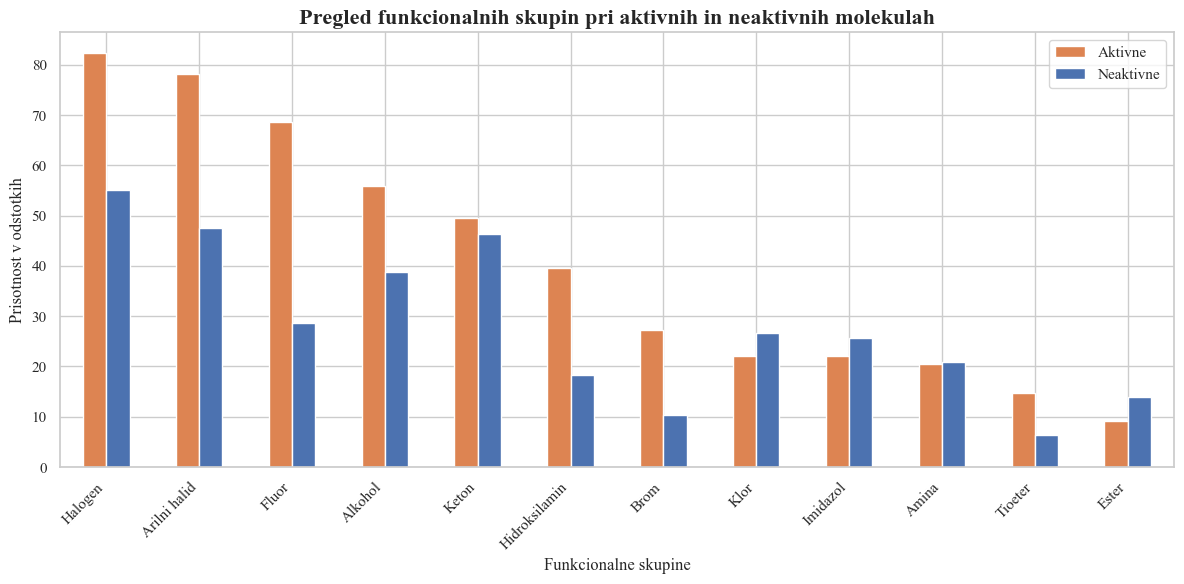

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nastavimo pisavo na Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Predpostavimo, da je DataFrame 'functional_group_comparison' že naložen

# Poskrbimo, da so stolpci s procenti številčni
functional_group_comparison['% of Active Molecules'] = pd.to_numeric(functional_group_comparison['% of Active Molecules'], errors='coerce')
functional_group_comparison['% of Inactive Molecules'] = pd.to_numeric(functional_group_comparison['% of Inactive Molecules'], errors='coerce')

# Odstranimo vrstice, kjer kateri koli odstotek ni številka (NaN)
functional_group_comparison.dropna(subset=['% of Active Molecules', '% of Inactive Molecules'], inplace=True)

# Dodamo stolpec za skupni odstotek (vsota aktivnih in neaktivnih molekul)
functional_group_comparison['Skupni odstotek'] = functional_group_comparison['% of Active Molecules'] + functional_group_comparison['% of Inactive Molecules']

# Filtriramo podatke, da obdržimo samo vrstice s skupnim odstotkom nad 20%
filtrirani_podatki = functional_group_comparison[functional_group_comparison['Skupni odstotek'] > 20]

# Slovenski prevodi funkcionalnih skupin
prevodi_skupin = {
    "Halogen": "Halogen",
    "Aryl Halide": "Arilni halid",
    "Fluorine": "Fluor",
    "Alcohol": "Alkohol",
    "Ketone": "Keton",
    "Hydroxylamine": "Hidroksilamin",
    "Bromine": "Brom",
    "Chlorine": "Klor",
    "Imidazole": "Imidazol",
    "Amine": "Amina",
    "Thioether": "Tioeter",
    "Sulfonamide": "Sulfonamid",
    "Geminal Dihalide": "Geminalni dihalid",
    "Urea": "Urea",
    "Ester": "Ester"
}

# Nadomestimo angleška imena funkcionalnih skupin s slovenskimi
filtrirani_podatki.loc[:, 'Functional Group'] = filtrirani_podatki['Functional Group'].replace(prevodi_skupin)

# Preverimo, če imamo kakšne podatke po filtriranju
if not filtrirani_podatki.empty:
    # Pridobimo privzeto barvno paleto Seaborn
    palette = sns.color_palette()
    
    # Opomba:
    # Stolpci so urejeni kot:
    #   0: '% of Active Molecules'
    #   1: '% of Inactive Molecules'
    # Želimo, da:
    #   - Aktivne molekule dobijo drugo barvo (palette[1])
    #   - Neaktivne molekule dobijo prvo barvo (palette[0])
    filtrirani_podatki[['% of Active Molecules', '% of Inactive Molecules']] \
        .set_index(filtrirani_podatki['Functional Group']) \
        .plot(kind='bar', figsize=(12,6), color=[palette[1], palette[0]])
    
    # Nastavimo naslov z večjim fontom in krepko pisavo
    plt.title("Pregled funkcionalnih skupin pri aktivnih in neaktivnih molekulah", fontsize=16, fontweight='bold')
    plt.xlabel("Funkcionalne skupine", fontsize=12)
    plt.ylabel("Prisotnost v odstotkih", fontsize=12)
    plt.legend(["Aktivne", "Neaktivne"])
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Ni funkcionalnih skupin s skupnim odstotkom nad 20%.")

## 
## Statistični testi
##

## Neprekinjene spremeljivke - pregled porazdelitve

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Example DataFrames
# active_molecules = pd.read_csv('active_molecules.csv')
# inactive_molecules = pd.read_csv('inactive_molecules.csv')

continuous_properties = ['Molekulska_masa', 'logP']

# Descriptive Statistics
def descriptive_stats(df, properties):
    return df[properties].describe()

active_stats = descriptive_stats(active_molecules, continuous_properties)
inactive_stats = descriptive_stats(inactive_molecules, continuous_properties)

print("Active Molecules Stats:\n", active_stats)
print("\nInactive Molecules Stats:\n", inactive_stats)

Active Molecules Stats:
        Molekulska_masa         logP
count      2103.000000  2103.000000
mean        401.174511     3.464503
std          79.208688     1.940915
min         108.144000    -1.045900
25%         347.239000     1.892500
50%         405.473000     3.614980
75%         455.656500     4.806560
max         690.216000     9.545700

Inactive Molecules Stats:
        Molekulska_masa        logP
count      2039.000000  2039.00000
mean        325.203618     3.31945
std         100.663996     1.64308
min         109.128000    -2.10969
25%         257.782000     2.15350
50%         317.391000     3.24710
75%         381.425000     4.33410
max         966.816000     9.10100


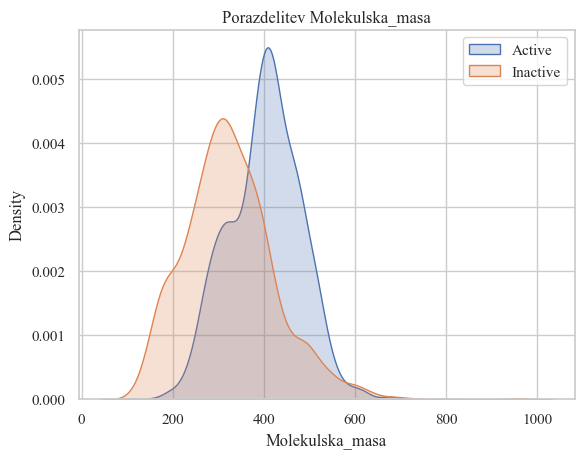

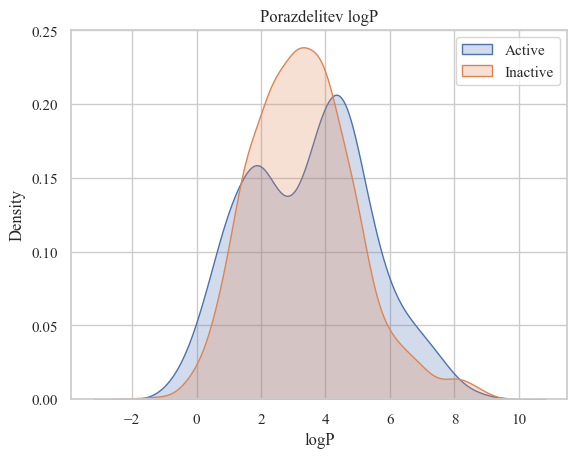

In [24]:
# Updated Visualization Code
for prop in continuous_properties:
    sns.kdeplot(active_molecules[prop], label='Active', fill=True)
    sns.kdeplot(inactive_molecules[prop], label='Inactive', fill=True)
    plt.title(f'Porazdelitev {prop}')
    plt.legend()
    plt.show()

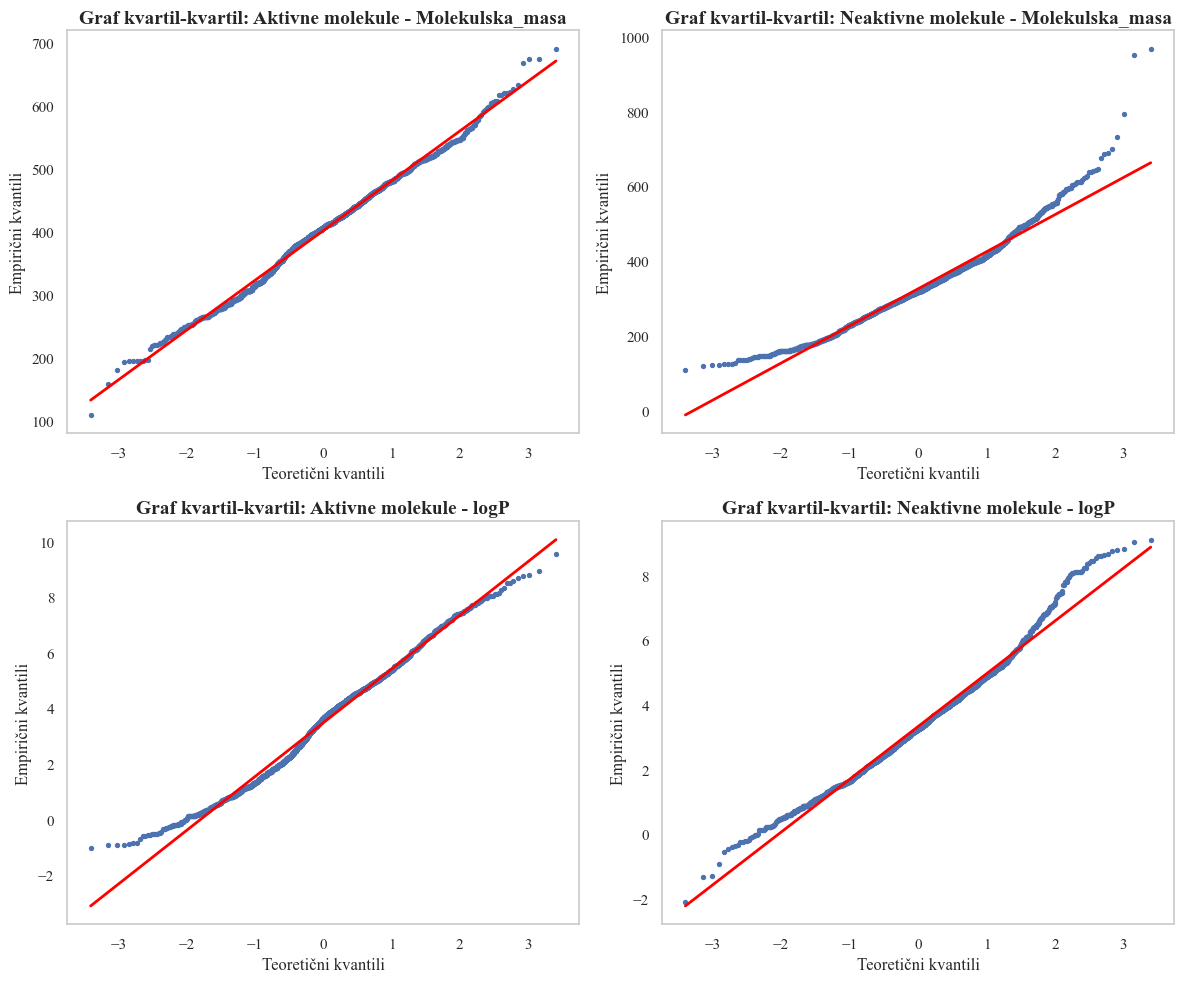

In [25]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Funkcija za risanje Q-Q plota
def qq_plot(ax, data, property_name, label):
    # Pridobite teoretične in empirične kvantile
    (osm, osr), (slope, intercept, r) = stats.probplot(data[property_name], dist="norm")
    
    # Narišite teoretične kvantile
    ax.scatter(osm, osr, s=8)  # s=10 nastavi velikost točk
    ax.plot(osm, slope * osm + intercept, color='red', lw=2)  # Narišite regresijsko črto
    ax.set_title(f'Graf kvartil-kvartil: {label} - {property_name}', fontweight='bold', fontsize=14)  # Bold and bigger title
    ax.set_xlabel('Teoretični kvantili')
    ax.set_ylabel('Empirični kvantili')
    ax.grid()

# Ustvarite mrežo 2x2 za Q-Q plote
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Prva lastnost: Molarna masa (MM)
property_name_mm = 'Molekulska_masa'  # Zamenjajte z dejanskim imenom stolpca
qq_plot(axs[0, 0], active_molecules, property_name_mm, 'Aktivne molekule')
qq_plot(axs[0, 1], inactive_molecules, property_name_mm, 'Neaktivne molekule')

# Druga lastnost: log P
property_name_logp = 'logP'  # Zamenjajte z dejanskim imenom stolpca
qq_plot(axs[1, 0], active_molecules, property_name_logp, 'Aktivne molekule')
qq_plot(axs[1, 1], inactive_molecules, property_name_logp, 'Neaktivne molekule')

plt.tight_layout()  # Prilagodi razmik med podgrafi
plt.show()

In [26]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson

def check_normality(active_molecules, inactive_molecules, properties):
    # Initialize a single DataFrame to store all results
    results_df = pd.DataFrame(columns=[
        'Property', 'Test', 'Group', 'Statistic', 'p-value', 'Critical Values', 'Significance Level'
    ])

    for property_name in properties:
        rows = []  # Temporary storage for rows to add to DataFrame

        # Shapiro-Wilk Test
        shapiro_active_stat, shapiro_active_p = shapiro(active_molecules[property_name])
        shapiro_inactive_stat, shapiro_inactive_p = shapiro(inactive_molecules[property_name])

        rows.extend([
            {'Property': property_name, 'Test': 'Shapiro-Wilk', 'Group': 'Active', 
             'Statistic': shapiro_active_stat, 'p-value': shapiro_active_p},
            {'Property': property_name, 'Test': 'Shapiro-Wilk', 'Group': 'Inactive', 
             'Statistic': shapiro_inactive_stat, 'p-value': shapiro_inactive_p}
        ])

        # Kolmogorov-Smirnov Test
        ks_stat, ks_p = ks_2samp(active_molecules[property_name], inactive_molecules[property_name])
        rows.append({
            'Property': property_name, 'Test': 'Kolmogorov-Smirnov', 'Group': 'Both', 
            'Statistic': ks_stat, 'p-value': ks_p
        })

        # Anderson-Darling Test
        ad_result_active = anderson(active_molecules[property_name])
        ad_result_inactive = anderson(inactive_molecules[property_name])

        rows.extend([
            {'Property': property_name, 'Test': 'Anderson-Darling', 'Group': 'Active', 
             'Statistic': ad_result_active.statistic, 
             'Critical Values': ad_result_active.critical_values, 
             'Significance Level': ad_result_active.significance_level},
            {'Property': property_name, 'Test': 'Anderson-Darling', 'Group': 'Inactive', 
             'Statistic': ad_result_inactive.statistic, 
             'Critical Values': ad_result_inactive.critical_values, 
             'Significance Level': ad_result_inactive.significance_level}
        ])

        # Only concatenate if rows is not empty
        if rows:
            new_df = pd.DataFrame(rows)
            if not new_df.empty:  # Ensure new_df is not empty before concatenation
                results_df = pd.concat([results_df, new_df], ignore_index=True)

    return results_df


properties = ['logP', 'Molekulska_masa']
normality_results_df = check_normality(active_molecules, inactive_molecules, properties)

normality_results_df

/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_27076/1115550465.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_df], ignore_index=True)


,Property,Test,Group,Statistic,p-value,Critical Values,Significance Level
0,logP,Shapiro-Wilk,Active,0.989134,1.669352e-11,NaN,NaN
1,logP,Shapiro-Wilk,Inactive,0.986017,3.153753e-13,NaN,NaN
2,logP,Kolmogorov-Smirnov,Both,0.113341,4.805507e-12,NaN,NaN
3,logP,Anderson-Darling,Active,7.000004,NaN,"[0.575, 0.655, 0.786, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
4,logP,Anderson-Darling,Inactive,4.800836,NaN,"[0.575, 0.655, 0.785, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
5,Molekulska_masa,Shapiro-Wilk,Active,0.995390,4.386763e-06,NaN,NaN
6,Molekulska_masa,Shapiro-Wilk,Inactive,0.968240,8.313616e-21,NaN,NaN
7,Molekulska_masa,Kolmogorov-Smirnov,Both,0.395765,2.521371e-145,NaN,NaN
8,Molekulska_masa,Anderson-Darling,Active,3.705492,NaN,"[0.575, 0.655, 0.786, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
9,Molekulska_masa,Anderson-Darling,Inactive,8.553841,NaN,"[0.575, 0.655, 0.785, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"


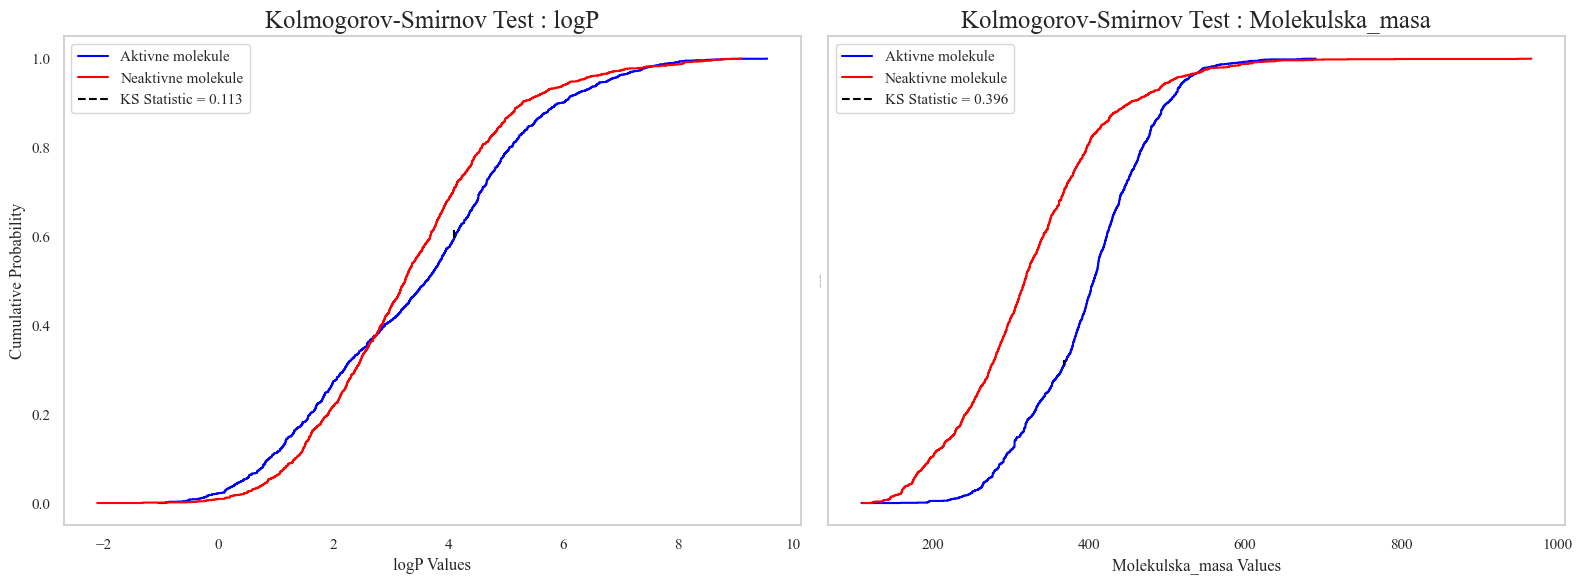

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

# Define the properties to analyze
properties = ['logP', 'Molekulska_masa']

# Set up a figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, property_name in enumerate(properties):
    # Extract data for the property from active and inactive molecules
    active_data = active_molecules[property_name]
    inactive_data = inactive_molecules[property_name]

    # Compute the empirical CDFs
    active_sorted = np.sort(active_data)
    inactive_sorted = np.sort(inactive_data)

    active_cdf = np.arange(1, len(active_sorted) + 1) / len(active_sorted)
    inactive_cdf = np.arange(1, len(inactive_sorted) + 1) / len(inactive_sorted)

    # Perform the KS test
    ks_stat, ks_p = ks_2samp(active_data, inactive_data)

    # Plot the empirical CDFs
    ax = axes[i]
    ax.step(active_sorted, active_cdf, label='Aktivne molekule', color='blue', where='post')
    ax.step(inactive_sorted, inactive_cdf, label='Neaktivne molekule', color='red', where='post')

    # Highlight the KS statistic (maximum distance between CDFs)
    ks_distance_idx = np.argmax(np.abs(active_cdf - np.interp(active_sorted, inactive_sorted, inactive_cdf)))
    ax.vlines(active_sorted[ks_distance_idx], inactive_cdf[ks_distance_idx], active_cdf[ks_distance_idx], color='black', linestyle='--', label=f'KS Statistic = {ks_stat:.3f}')

    # Add labels, legend, and title
    ax.set_title(f'Kolmogorov-Smirnov Test : {property_name}', fontsize=18)
    ax.set_xlabel(f'{property_name} Values', fontsize=12)
    ax.set_ylabel('Cumulative Probability', fontsize=12 if i == 0 else 0)
    ax.legend()
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
def print_normality_results(normality_results_df):
    for property_name in normality_results_df['Property'].unique():
        print(f"\n=== Distribution of {property_name} ===")
        property_df = normality_results_df[normality_results_df['Property'] == property_name]

        for test_name in property_df['Test'].unique():
            print(f"\n{test_name} Test:")
            test_df = property_df[property_df['Test'] == test_name]

            for _, row in test_df.iterrows():
                group = row['Group']
                stat = row['Statistic']
                p_value = row.get('p-value', None)  # Some tests may not have p-value
                critical_values = row.get('Critical Values', None)
                significance_levels = row.get('Significance Level', None)

                print(f"- For {group}:")
                if p_value is not None:
                    if p_value < 0.05:
                        print(f"  Non-normal distribution (p = {p_value:}, Statistic = {stat:})")
                    else:
                        print(f"  Likely normal distribution (p = {p_value:}, Statistic = {stat:})")
                else:
                    print(f"  Statistic = {stat:.4f}")
                    if critical_values is not None and significance_levels is not None:
                        print(f"  Critical Values = {critical_values}")
                        print(f"  Significance Levels = {significance_levels}")

# Print the detailed interpretation for each property and test
print_normality_results(normality_results_df)


=== Distribution of logP ===

Shapiro-Wilk Test:
- For Active:
  Non-normal distribution (p = 1.6693519333818415e-11, Statistic = 0.9891335908104236)
- For Inactive:
  Non-normal distribution (p = 3.1537527641920647e-13, Statistic = 0.9860173387689454)

Kolmogorov-Smirnov Test:
- For Both:
  Non-normal distribution (p = 4.805507276382133e-12, Statistic = 0.11334073535622644)

Anderson-Darling Test:
- For Active:
  Likely normal distribution (p = nan, Statistic = 7.0000042415513235)
- For Inactive:
  Likely normal distribution (p = nan, Statistic = 4.800836471329603)

=== Distribution of Molekulska_masa ===

Shapiro-Wilk Test:
- For Active:
  Non-normal distribution (p = 4.386762984336306e-06, Statistic = 0.9953904897709771)
- For Inactive:
  Non-normal distribution (p = 8.313615504681357e-21, Statistic = 0.9682397979356819)

Kolmogorov-Smirnov Test:
- For Both:
  Non-normal distribution (p = 2.5213711322569937e-145, Statistic = 0.3957645223887872)

Anderson-Darling Test:
- For Active:

## Neprekinjene spremenljivke - statistični testi

In [29]:
from scipy.stats import mannwhitneyu

def perform_mannwhitney(active_molecules, inactive_molecules, property_name):
    # Perform Mann-Whitney U Test
    stat, p_value = mannwhitneyu(active_molecules[property_name], inactive_molecules[property_name])

    # Compare the medians to determine direction
    median_active = active_molecules[property_name].median()
    median_inactive = inactive_molecules[property_name].median()

    # Determine direction
    if median_active > median_inactive:
        direction = "Active molecules tend to have higher values"
    elif median_active < median_inactive:
        direction = "Inactive molecules tend to have higher values"
    else:
        direction = "Medians are equal"

    # Interpretation
    result = {
        'Property': property_name,
        'Statistic': stat,
        'p-value': p_value,
        'Direction': direction,
        'Interpretation': 'Significant difference' if p_value < 0.05 else 'No significant difference'
    }

    return result


property_name = 'logP'
result = perform_mannwhitney(active_molecules, inactive_molecules, property_name)

# Display the results
print(f"\n--- Mann-Whitney U Test Result for {result['Property']} ---")
print(f"Statistic: {result['Statistic']}")
print(f"P-value: {result['p-value']}")
print(f"Direction: {result['Direction']}")
print(f"Interpretation: {result['Interpretation']}")

property_name2 = 'Molekulska_masa'
result2 = perform_mannwhitney(active_molecules, inactive_molecules, property_name2)
# Display the results
print(f"\n--- Mann-Whitney U Test Result for {result2['Property']} ---")
print(f"Statistic: {result2['Statistic']}")
print(f"P-value: {result2['p-value']}")
print(f"Direction: {result2['Direction']}")
print(f"Interpretation: {result2['Interpretation']}")


--- Mann-Whitney U Test Result for logP ---
Statistic: 2262629.5
P-value: 0.0020496829551706684
Direction: Active molecules tend to have higher values
Interpretation: Significant difference

--- Mann-Whitney U Test Result for Molekulska_masa ---
Statistic: 3173001.0
P-value: 1.472696703331687e-157
Direction: Active molecules tend to have higher values
Interpretation: Significant difference


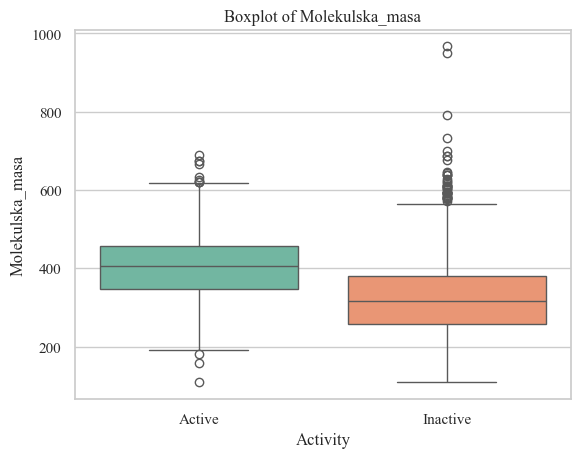

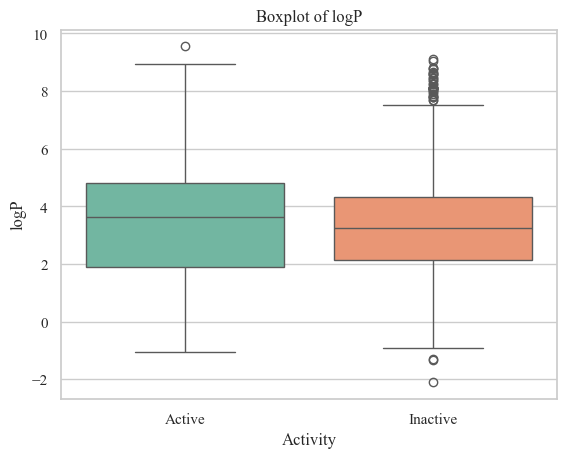

In [30]:
# Combine active and inactive molecules for boxplot
for prop in continuous_properties:
    combined_data = pd.DataFrame({
        prop: pd.concat([active_molecules[prop], inactive_molecules[prop]]),
        'Activity': ['Active'] * len(active_molecules) + ['Inactive'] * len(inactive_molecules)
    })
    
    sns.boxplot(x='Activity', y=prop, data=combined_data, hue='Activity', palette='Set2', dodge=False)
    plt.title(f'Boxplot of {prop}')
    plt.legend([], [], frameon=False)  # Remove redundant legend
    plt.show()

## Kategoricne lastnosti

In [31]:
import pandas as pd
from scipy.stats import mannwhitneyu

# List of categorical properties
categorical_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 
                          'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Add an 'Activity' column to both DataFrames to distinguish active and inactive molecules
active_molecules = active_molecules.copy()
inactive_molecules = inactive_molecules.copy()

# Add the 'Activity' column
active_molecules['Activity'] = 'Active'
inactive_molecules['Activity'] = 'Inactive'

# Combine the data
combined_data = pd.concat([active_molecules[categorical_properties + ['Activity']],
                           inactive_molecules[categorical_properties + ['Activity']]])

# Create a list to store the results
results_list = []

for prop in categorical_properties:
    print(f"\nAnalyzing property: {prop}")
    
    # Ensure properties are treated as categorical for the analysis
    combined_data[prop] = combined_data[prop].astype(int)

    # Separate active and inactive groups for the current property
    active_values = combined_data.loc[combined_data['Activity'] == 'Active', prop]
    inactive_values = combined_data.loc[combined_data['Activity'] == 'Inactive', prop]
    
    # Debugging: Print the first few values for active and inactive groups
    print(f"  Active values ({prop}): {active_values.head().to_list()}")
    print(f"  Inactive values ({prop}): {inactive_values.head().to_list()}")
    
    # Check if both groups have enough data for the test
    if len(active_values) < 2 or len(inactive_values) < 2:
        print(f"  Not enough data for Mann-Whitney U Test for {prop}. Skipping.")
        continue
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(active_values, inactive_values, alternative='two-sided')
    
    print(f"  Mann-Whitney U Test: U = {u_stat:.4f}, p = {p_value:.4e}")
    
    # Store the result
    results_list.append({
        'Property': prop,
        'Test': 'Mann-Whitney U',
        'U_stat': round(u_stat, 4),
        'p-value': f"{p_value:.4e}"
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results_list)

# Display the final DataFrame
print("\nFinal Results DataFrame:")
results_df


Analyzing property: Število_O_atomov
  Active values (Število_O_atomov): [4, 2, 3, 1, 2]
  Inactive values (Število_O_atomov): [0, 3, 3, 1, 1]
  Mann-Whitney U Test: U = 2551114.0000, p = 3.1352e-27

Analyzing property: Število_N_atomov
  Active values (Število_N_atomov): [3, 2, 2, 4, 2]
  Inactive values (Število_N_atomov): [4, 4, 3, 5, 4]
  Mann-Whitney U Test: U = 3091156.0000, p = 1.4779e-138

Analyzing property: Akceptorji_H_vezi
  Active values (Akceptorji_H_vezi): [6, 3, 3, 4, 2]
  Inactive values (Akceptorji_H_vezi): [4, 7, 3, 5, 3]
  Mann-Whitney U Test: U = 3020164.5000, p = 9.2129e-118

Analyzing property: Donorji_H_vezi
  Active values (Donorji_H_vezi): [0, 1, 2, 1, 2]
  Inactive values (Donorji_H_vezi): [2, 3, 4, 1, 2]
  Mann-Whitney U Test: U = 2764041.0000, p = 4.8630e-62

Analyzing property: Število_aromatskih_obročev
  Active values (Število_aromatskih_obročev): [3, 3, 3, 2, 2]
  Inactive values (Število_aromatskih_obročev): [2, 3, 3, 4, 3]
  Mann-Whitney U Test: U = 

,Property,Test,U_stat,p-value
0,Število_O_atomov,Mann-Whitney U,2551114.0,3.1352e-27
1,Število_N_atomov,Mann-Whitney U,3091156.0,1.4779e-138
2,Akceptorji_H_vezi,Mann-Whitney U,3020164.5,9.2129e-118
3,Donorji_H_vezi,Mann-Whitney U,2764041.0,4.8630e-62
4,Število_aromatskih_obročev,Mann-Whitney U,2159583.0,6.6307e-01
5,Število_rotirajočih_vezi,Mann-Whitney U,3059322.0,3.1964e-127
